In [1]:
import pandas as pd 
import numpy as np 
import os 
import xml.etree.ElementTree as ET
import glob
import json 

In [3]:

def xml_to_yolo_bbox(bbox, w, h):
    x_center = ((bbox[2] + bbox[0]) / 2) / w
    y_center = ((bbox[3] + bbox[1]) / 2) / h
    width = (bbox[2] - bbox[0]) / w
    height = (bbox[3] - bbox[1]) / h
    return [x_center, y_center, width, height]


def yolo_to_xml_bbox(bbox, w, h):
    w_half_len = (bbox[2] * w) / 2
    h_half_len = (bbox[3] * h) / 2
    xmin = int((bbox[0] * w) - w_half_len)
    ymin = int((bbox[1] * h) - h_half_len)
    xmax = int((bbox[0] * w) + w_half_len)
    ymax = int((bbox[1] * h) + h_half_len)
    return [xmin, ymin, xmax, ymax]

In [4]:


import xml.etree.ElementTree as ET
import glob
import json


def xml_to_yolo_bbox(bbox, w, h):
    x_center = ((bbox[2] + bbox[0]) / 2) / w
    y_center = ((bbox[3] + bbox[1]) / 2) / h
    width = (bbox[2] - bbox[0]) / w
    height = (bbox[3] - bbox[1]) / h
    return [x_center, y_center, width, height]


def yolo_to_xml_bbox(bbox, w, h):
    w_half_len = (bbox[2] * w) / 2
    h_half_len = (bbox[3] * h) / 2
    xmin = int((bbox[0] * w) - w_half_len)
    ymin = int((bbox[1] * h) - h_half_len)
    xmax = int((bbox[0] * w) + w_half_len)
    ymax = int((bbox[1] * h) + h_half_len)
    return [xmin, ymin, xmax, ymax]


classes = []
input_dir = "/kaggle/input/helmet-detection/annotations/"
output_dir = "labels/"
image_dir = "/kaggle/input/helmet-detection/images/"

if not os.path.isdir(output_dir):
    os.mkdir(output_dir)


files = glob.glob(os.path.join(input_dir, '*.xml'))


for fil in files:
    basename = os.path.basename(fil)
    filename = os.path.splitext(basename)[0]
    # check if the label contains the corresponding image file
    if not os.path.exists(os.path.join(image_dir, f"{filename}.png")):
        print(f"{filename} image does not exist!")
        continue

    result = []

   
    tree = ET.parse(fil)
    root = tree.getroot()
    width = int(root.find("size").find("width").text)
    height = int(root.find("size").find("height").text)

    for obj in root.findall('object'):
        label = obj.find("name").text
        
        if label not in classes:
            classes.append(label)
        index = classes.index(label)
        pil_bbox = [int(x.text) for x in obj.find("bndbox")]
        yolo_bbox = xml_to_yolo_bbox(pil_bbox, width, height)
        bbox_string = " ".join([str(x) for x in yolo_bbox])
        result.append(f"{index} {bbox_string}")

    if result:
        with open(os.path.join(output_dir, f"{filename}.txt"), "w", encoding="utf-8") as f:
            f.write("\n".join(result))


with open('classes.txt', 'w', encoding='utf8') as f:
    f.write(json.dumps(classes))
    
print("XML to YOLO Format Done!!")



XML to YOLO Format Done!!


In [2]:
import cv2

In [4]:
cv2.imread('/home/saaho/THYTECH/HelmetDetection/HelmetDetection/Data/Dataset/DataV2_images/saahoimage_20.jpg')

array([[[190, 213, 191],
        [190, 212, 193],
        [192, 211, 194],
        ...,
        [248, 248, 248],
        [248, 248, 248],
        [248, 248, 248]],

       [[189, 212, 190],
        [190, 213, 191],
        [193, 212, 195],
        ...,
        [248, 248, 248],
        [248, 248, 248],
        [248, 248, 248]],

       [[190, 212, 188],
        [191, 213, 189],
        [192, 212, 193],
        ...,
        [248, 248, 248],
        [248, 248, 248],
        [248, 248, 248]],

       ...,

       [[175, 181, 164],
        [175, 181, 164],
        [173, 181, 164],
        ...,
        [155, 154, 156],
        [158, 154, 159],
        [157, 153, 158]],

       [[172, 178, 161],
        [172, 178, 161],
        [173, 179, 162],
        ...,
        [158, 157, 159],
        [159, 158, 162],
        [159, 158, 162]],

       [[170, 176, 159],
        [170, 176, 159],
        [171, 177, 160],
        ...,
        [159, 158, 160],
        [159, 158, 162],
        [158, 157, 161]]

In [ ]:


import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/home/saaho/THYTECH/HelmetDetection/HelmetDetection/Data/Dataset/DataV2_images/saahohelmetimage_3.jpg")
dh, dw, _ = img.shape

fl = open("/home/saaho/THYTECH/HelmetDetection/HelmetDetection/Data/Dataset/DataV2Labels/saahohelmetimage_3.txt", 'r')
data = fl.readlines()
fl.close()

for dt in data:

    
    _, x, y, w, h = map(float, dt.split(' '))

   
    
    l = int((x - w / 2) * dw)
    r = int((x + w / 2) * dw)
    t = int((y - h / 2) * dh)
    b = int((y + h / 2) * dh)
    
    if l < 0:
        l = 0
    if r > dw - 1:
        r = dw - 1
    if t < 0:
        t = 0
    if b > dh - 1:
        b = dh - 1

    cv2.rectangle(img, (l, t), (r, b), (0, 0, 255), 1)

plt.imshow(img)

plt.show()
print(_ , 'with helmet')



In [ ]:
from sklearn.model_selection import train_test_split
import shutil
import os

IMAGES_PATH = "/kaggle/input/helmet-detection/images"
LABELS_PATH = "labels/"

labels = os.listdir(LABELS_PATH)


train, test = train_test_split(labels, test_size=0.15, shuffle=True)
valid, test = train_test_split(test, test_size=0.2)

print(f"train: {len(train)}; valid: {len(valid)}; test: {len(test)}")

os.makedirs("test/images")
os.makedirs("test/labels")
os.makedirs("train/images")
os.makedirs("train/labels")
os.makedirs("valid/images")
os.makedirs("valid/labels")

def move_files_to_dir(files, dirname):
    for label_filename in files:
        image_filename = f"{label_filename[:-4]}.png"
        shutil.copy(f"{IMAGES_PATH}/{image_filename}", f"{dirname}/images/{image_filename}")
        shutil.copy(f"{LABELS_PATH}/{label_filename}", f"{dirname}/labels/{label_filename}")



move_files_to_dir(train, "train")
move_files_to_dir(test, "test")
move_files_to_dir(valid, "valid")

print("Train Test Split Done!!")

In [6]:
!pip install ultralytics
!pip install tensorboard
%load_ext tensorboard
%tensorboard --logdir runs/train


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 20.7 MB/s eta 0:00:0000:01


<IPython.core.display.Javascript object>

In [7]:


import yaml


data = {
    'train': '/kaggle/working/train/images',
    'val': '/kaggle/working/valid/images',
    'test': '/kaggle/working/test/images', 
    'nc': 2,  
    'names': ['Without Helmet', 'With Helmet'] 
}


with open('/kaggle/working/dataset.yaml', 'w') as f:
    yaml.dump(data, f)



In [2]:
from ultralytics import YOLO


In [ ]:
# Load YOLOv8 model
from ultralytics import YOLO

# Load YOLOv8 model
model = YOLO("yolov8s.pt")  # Use 'yolov8m.pt' for better accuracy

# Train



In [9]:
results = model.train(
    data='/kaggle/working/dataset.yaml',  
    epochs=20,                           
    imgsz=640,                          
    batch=16,                            
    augment=True,                       
    fliplr=0.5,                          
    degrees=15,                          
    scale=0.2,                           
    translate=0.1,                      
    hsv_h=0.015,                         
    hsv_s=0.7,                           
    hsv_v=0.4,                           
    mosaic=1.0,                          
    mixup=0.2                                                                               
)

Ultralytics 8.3.85 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/dataset.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

100%|██████████| 755k/755k [00:00<00:00, 25.8MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 128MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/train/labels... 646 images, 0 backgrounds, 12 corrupt: 100%|██████████| 646/646 [00:01<00:00, 442.83it/s]

train: WARNING ⚠️ /kaggle/working/train/images/BikesHelmets103.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     408.72      81.502      71.037      83.004]
train: WARNING ⚠️ /kaggle/working/train/images/BikesHelmets205.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      263.5          43          85          74]
train: WARNING ⚠️ /kaggle/working/train/images/BikesHelmets279.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      194.5          56         103         100]
train: WARNING ⚠️ /kaggle/working/train/images/BikesHelmets326.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [        157        56.5          86          97]
train: WARNING ⚠️ /kaggle/working/train/images/BikesHelmets441.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      310.5        41.5          61          63]
train: WARNING ⚠️ /kaggle/working/train/

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/working/valid/labels... 92 images, 0 backgrounds, 2 corrupt: 100%|██████████| 92/92 [00:00<00:00, 444.33it/s]

val: WARNING ⚠️ /kaggle/working/valid/images/BikesHelmets140.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     547.68        84.5      132.16         151]
val: WARNING ⚠️ /kaggle/working/valid/images/BikesHelmets343.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     682.27       150.5      118.22         107]
val: New cache created: /kaggle/working/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20       3.8G      1.777      2.912      1.639         37        640: 100%|██████████| 40/40 [00:12<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.52it/s]

                   all         90        158      0.397      0.632      0.393      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      3.75G      1.515      1.551       1.42         33        640: 100%|██████████| 40/40 [00:11<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]

                   all         90        158       0.58       0.64      0.595      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      3.76G      1.499       1.53      1.382         30        640: 100%|██████████| 40/40 [00:11<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]

                   all         90        158      0.495      0.359       0.33      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      3.78G      1.498      1.465      1.379         30        640: 100%|██████████| 40/40 [00:11<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]

                   all         90        158      0.524       0.44      0.404      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      3.79G      1.434      1.331      1.337         27        640: 100%|██████████| 40/40 [00:10<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.08it/s]

                   all         90        158      0.623      0.691      0.659       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      3.79G      1.468      1.301      1.363         20        640: 100%|██████████| 40/40 [00:11<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]

                   all         90        158      0.562      0.683      0.631      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      3.78G      1.415      1.247      1.347         26        640: 100%|██████████| 40/40 [00:11<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]

                   all         90        158      0.563      0.691       0.67      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      3.78G      1.396      1.235      1.331         41        640: 100%|██████████| 40/40 [00:11<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all         90        158      0.672      0.737      0.749      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20       3.8G      1.384      1.166      1.325         61        640: 100%|██████████| 40/40 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]

                   all         90        158      0.684       0.81      0.786      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      3.78G      1.368       1.11      1.312         43        640: 100%|██████████| 40/40 [00:11<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.90it/s]

                   all         90        158      0.753      0.746      0.763      0.409


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      3.78G      1.271     0.9184      1.253         15        640: 100%|██████████| 40/40 [00:11<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.02it/s]

                   all         90        158      0.724      0.766      0.777      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      3.78G      1.248     0.8743      1.244         22        640: 100%|██████████| 40/40 [00:10<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.25it/s]

                   all         90        158      0.748      0.708      0.744      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      3.78G      1.201     0.8261      1.208         16        640: 100%|██████████| 40/40 [00:10<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]

                   all         90        158      0.679      0.783      0.693      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      3.76G      1.187     0.7796      1.194         13        640: 100%|██████████| 40/40 [00:10<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all         90        158      0.823      0.791      0.862      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      3.78G      1.153     0.7512      1.182         13        640: 100%|██████████| 40/40 [00:10<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.24it/s]

                   all         90        158      0.756      0.812      0.815      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      3.77G      1.106     0.6912      1.149         34        640: 100%|██████████| 40/40 [00:10<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.36it/s]

                   all         90        158      0.796      0.787       0.82      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      3.78G      1.141     0.6728      1.161         16        640: 100%|██████████| 40/40 [00:11<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]

                   all         90        158      0.784      0.764      0.825      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      3.76G      1.109     0.6487      1.149         16        640: 100%|██████████| 40/40 [00:11<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.24it/s]

                   all         90        158       0.81      0.842       0.86       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      3.76G      1.075     0.6132      1.133         21        640: 100%|██████████| 40/40 [00:10<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.22it/s]

                   all         90        158      0.818      0.828      0.851      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      3.78G      1.054     0.5926      1.113         20        640: 100%|██████████| 40/40 [00:10<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.32it/s]

                   all         90        158      0.817      0.836       0.85       0.53



20 epochs completed in 0.073 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.85 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.69it/s]


                   all         90        158      0.789      0.831      0.854      0.527
        Without Helmet         33         55      0.773      0.807      0.804      0.457
           With Helmet         64        103      0.804      0.854      0.904      0.597


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 15.2ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train


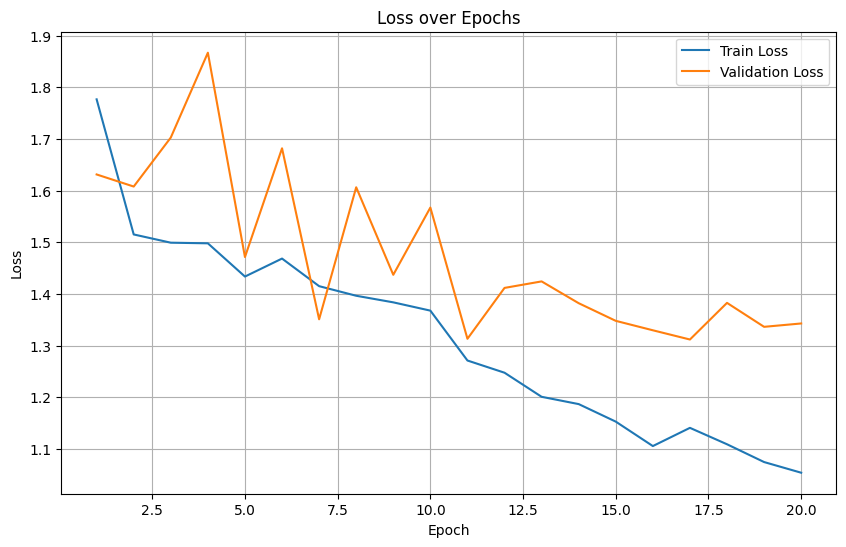

<Figure size 640x480 with 0 Axes>

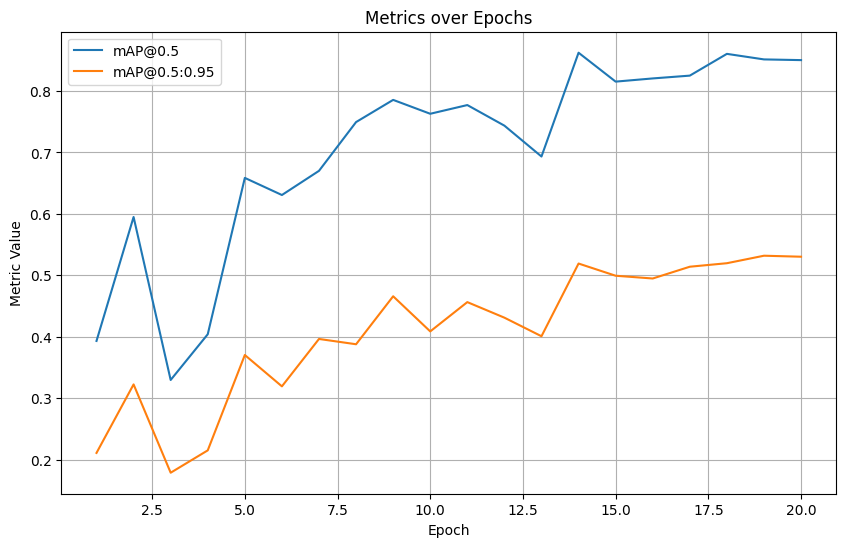

Final mAP@0.5: 0.85027
Final mAP@0.5:0.95: 0.53028


<Figure size 640x480 with 0 Axes>

In [11]:
log_dir = '/kaggle/working/runs/detect/train'  
csv_file = f"{log_dir}/results.csv" 

logs = pd.read_csv(csv_file)


epochs = logs['epoch']
train_box_loss = logs['train/box_loss']
val_box_loss = logs['val/box_loss']
map_05 = logs['metrics/mAP50(B)']
map_50_95 = logs['metrics/mAP50-95(B)']

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_box_loss, label='Train Loss')
plt.plot(epochs, val_box_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


plt.savefig('loss_plot.png')


plt.figure(figsize=(10, 6))
plt.plot(epochs, map_05, label='mAP@0.5')
plt.plot(epochs, map_50_95, label='mAP@0.5:0.95')
plt.title('Metrics over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.show()


plt.savefig('metrics_plot.png')


print(f"Final mAP@0.5: {map_05.iloc[-1]}")
print(f"Final mAP@0.5:0.95: {map_50_95.iloc[-1]}")




0: 384x640 2 Without Helmets, 286.1ms
Speed: 3.7ms preprocess, 286.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'Without Helmet', 1: 'With Helmet'}
obb: None
orig_img: array([[[230, 255, 255],
        [230, 255, 255],
        [221, 249, 249],
        ...,
        [176, 213, 197],
        [201, 231, 212],
        [211, 231, 212]],

       [[213, 241, 242],
        [216, 244, 245],
        [204, 232, 232],
        ...,
        [174, 211, 195],
        [201, 231, 212],
        [209, 231, 212]],

       [[217, 247, 248],
        [225, 255, 255],
        [215, 246, 245],
        ...,
        [185, 224, 209],
        [204, 238, 221],
        [206, 232, 214]],

       ...,

       [[196, 191, 182],
        [197, 192, 183],
        [198, 193, 184],
        ...,
        [163, 161, 151],
        [163, 161, 151],
        [162, 1

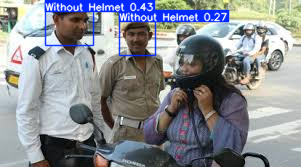

In [2]:
from ultralytics import YOLO


model = YOLO("kaggle/working/runs/detect/train/weights/best.pt")

from PIL import Image
import cv2
from IPython.display import display


img = cv2.imread("/home/saaho/THYTECH/HelmetDetection/withwithout.jpeg")


prediction = model.predict(img)[0]


print(prediction)


prediction_plot = prediction.plot(line_width=1)


prediction_rgb = prediction_plot[:, :, ::-1]


output_image = Image.fromarray(prediction_rgb)


output_image.save("output_image.png")


display(output_image)

